In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  

wine = fetch_ucirepo(id=109) 
  

X = wine.data.features 
y = wine.data.targets 
  



In [3]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()



In [4]:
x_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_scaled_pca = pca.fit_transform(x_scaled)



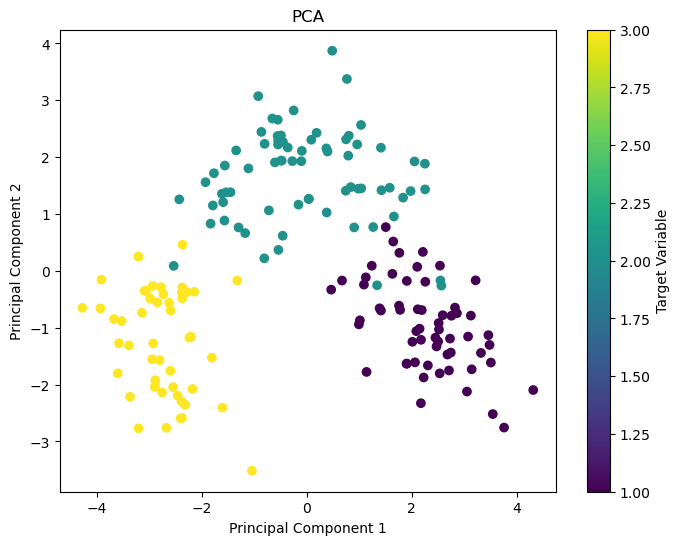

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x_scaled_pca[: , 0] , x_scaled_pca[:,1] , c=y.values.flatten(), cmap='viridis')

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Variable')
plt.show()

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)  
kmeans.fit(x_scaled_pca)
cluster_labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(x_scaled_pca, cluster_labels)


print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.5601697480957203
